In [ ]:
# Authors: Amit Jadhav and Samyak Sheth
# Part of Advance Concepts in Machine Learning Course
# Edited: 05th November 2022

### Routine Imports

In [ ]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
import matplotlib as mpl

### Defining and Initializing neural network weights and biases

In this assignment a 3 layered neural network is created. It contains of - 
*   One input layer with 8 nodes
*   One hidden layer with 3 nodes
*   One output layer with 8 nodes

This neural network is trained by epochs of forward and backward propogations where the associated weights and biases are updated according to the cost function.

The **reset_network function** below initialises the weights and biases to random values so that they can be trained. It creates matrices of the desired dimensions and assigns random values to them. 



In [ ]:
# This function initialises the network with it's structure, it also resets any training already done.
def reset_network (layer0=8, layer1=3, layer2=8, random=np.random) :
    global W10, W21, b1, b2
    W10 = random.randn(layer1, layer0) / 2
    W21 = random.randn(layer2, layer1) / 2
    b1 = random.randn(layer1, 1) / 2
    b2 = random.randn(layer2, 1) / 2
    return W10,W21,b1,b2

In [ ]:

# This is the cost function of a neural network with respect to a training set.
def cost(x, y):
    prediction=forward_propagate(x)[-1]
    # print(prediction)
    return la.norm(prediction.T - y)**2 / x.size # numpy linear algebra norm will return the L2 norm i.e. square root of the sum of squares of errors (i.e. prediction minus label). So cost function effectively is
    # square of (prediction - actual) / number of input samples.

### Forward-Propagation


For training the neural network, in the a forward propogation it uses an activation function, $\sigma(z)$ that calculates each activation of the network using feed-forward based on the following feed-forward equations

$$ \mathbf{z}^{(n)} = \mathbf{W}^{(n)}\mathbf{a}^{(n-1)} + \mathbf{b}^{(n)} $$

$$ \mathbf{a}^{(n)} = \sigma(\mathbf{z}^{(n)}) $$

The **logistic sigmoid function** is used as the activation function.
$$ \sigma(\mathbf{z}) = \frac{1}{1 + \exp(-\mathbf{z})} $$



In [ ]:
# Defining the sigmoid function and its derivative (NOTE: Derivative of sigmoid here will be mathematically equivalent to sigmoid*(1- sigmoid))
sigmoid = lambda z : 1 / (1 + np.exp(-z))

# This function feeds forward each activation to the next layer. It returns all weighted sums and activations.
def forward_propagate(a0) :  
    z01 = W10 @ a0 + b1.T
    a1 = sigmoid(z01)
    z12 = W21 @ a1.T + b2
    a2 = sigmoid(z12)
    return a0, z01, a1, z12, a2

### Defining input data for training

In [ ]:
def make_input_data():
    X = np.array([[1,0,0,0,0,0,0,0], [0,1,0,0,0,0,0,0], [0,0,1,0,0,0,0,0], [0,0,0,1,0,0,0,0], [0,0,0,0,1,0,0,0], [0,0,0,0,0,1,0,0], [0,0,0,0,0,0,1,0], [0,0,0,0,0,0,0,1]])
    Y = X # In our case the output is same as the input
    return X,Y

### Back-Propagation

The 4 functions in the following cell constitutes the Back Propogation for this neural network. It starts from the output layer and updates the wieghts and bias here. The following derivations are formulated by the chain rule and is used in the update.

For weights: 
$$ \frac{\partial C}{\partial \mathbf{W}^{(21)}} =
   \frac{\partial C}{\partial \mathbf{a}^{(2)}}
   \frac{\partial \mathbf{a}^{(2)}}{\partial \mathbf{z}^{(12)}}
   \frac{\partial \mathbf{z}^{(12)}}{\partial \mathbf{W}^{(21)}}
$$
For bias:
$$ \frac{\partial C}{\partial \mathbf{b}^{(2)}} =
   \frac{\partial C}{\partial \mathbf{a}^{(2)}}
   \frac{\partial \mathbf{a}^{(2)}}{\partial \mathbf{z}^{(12)}}
   \frac{\partial \mathbf{z}^{(12)}}{\partial \mathbf{b}^{(2)}}
$$
With the partial derivatives taking the form,
$$ \frac{\partial C}{\partial \mathbf{a}^{(2)}} = 2(\mathbf{a}^{(2)} - \mathbf{y}) $$
$$ \frac{\partial \mathbf{a}^{(2)}}{\partial \mathbf{z}^{(12)}} = \sigma'({z}^{(12)})$$
$$ \frac{\partial \mathbf{z}^{(2)}}{\partial \mathbf{W}^{(21)}} = \mathbf{a}^{(1)}$$
$$ \frac{\partial \mathbf{z}^{(12)}}{\partial \mathbf{b}^{(2)}} = 1
$$
For the next layer however, the derivals look like - 
$$ \frac{\partial C}{\partial \mathbf{W}^{(10)}} =
   \frac{\partial C}{\partial \mathbf{a}^{(2)}}
   \left(
   \frac{\partial \mathbf{a}^{(2)}}{\partial \mathbf{a}^{(1)}}
   \right)
   \frac{\partial \mathbf{a}^{(1)}}{\partial \mathbf{z}^{(01)}}
   \frac{\partial \mathbf{z}^{(01)}}{\partial \mathbf{W}^{(10)}}
$$

$$ \frac{\partial C}{\partial \mathbf{b}^{(1)}} =
   \frac{\partial C}{\partial \mathbf{a}^{(2)}}
   \left(
   \frac{\partial \mathbf{a}^{(2)}}{\partial \mathbf{a}^{(1)}}
   \right)
   \frac{\partial \mathbf{a}^{(1)}}{\partial \mathbf{z}^{(01)}}
   \frac{\partial \mathbf{z}^{(01)}}{\partial \mathbf{b}^{(1)}}
$$
With this we have moved one layer back in the network and here there is an extra term in the parantheses which takes the form:
$$ \frac{\partial \mathbf{a}^{(2)}}{\partial \mathbf{a}^{(1)}} =
   \frac{\partial \mathbf{a}^{(2)}}{\partial \mathbf{z}^{(12)}}
   \frac{\partial \mathbf{z}^{(12)}}{\partial \mathbf{a}^{(1)}} =
   \sigma'(\mathbf{z}^{(12)})
   \mathbf{W}^{(21)}
$$

In [ ]:
# BACK PROPAGATION OF LAYER 2 i.e. OUTPUT LAYER TO LAYER 1
dsigmoid_by_dz = lambda z : np.exp(z)/(1+np.exp(z))**2
#global alpha, noise
#alpha = 1
W10,W21,b1,b2=reset_network(8,3,8)
def backward_propagate_W21(X,Y,W10,W21,b1,b2,alpha): 
    for i in range(X[0].size):
        a0, z01, a1, z12, a2 = forward_propagate(X[i]) # forward propagating the input one at a time through the network.
        result1=2*(a2.T-Y[i]) # this is d(Cost) / d(activation)
        result1=result1*(dsigmoid_by_dz(z12).T) # this is d(a) / d(z)
        result1 = result1.T@a1 # this is d(z)/d(w)
        W21 = W21 - alpha*result1 # rectifying the weight at this layer based on the error gradient to complete back-propagation
        # print("After W21 rectification:","Input:",a0,"\nHidden Layer Activation:",a1,"\nPrediction:",a2.T,"\n")
    return W21
def backward_propagate_b2(X,Y,W10,W21,b1,b2,alpha):
    for i in range(X[0].size):
        a0, z01, a1, z12, a2 = forward_propagate(X[i]) # forward propagating the input one at a time through the network.
        result2=2*(a2.T-Y[i]) # this is d(Cost) / d(activation)
        result2=(result2*dsigmoid_by_dz(z12).T).T # this is d(a) / d(z)
        result2 = np.sum(result2, axis=1, keepdims=True) 
        b2 = b2 - alpha*result2  # rectifying the bias at this layer based on the error gradient to complete back-propagation
        # print("After b2 rectification:","Input:",a0,"\nHidden Layer Activation:",a1,"\nPrediction:",a2.T,"\n")
    return b2
    # BACK PROPAGATION OF LAYER 1 TO LAYER 0 i.e. INPUT LAYER
def backward_propagate_W10(X,Y,W10,W21,b1,b2,alpha):
    for i in range(X[0].size):
        a0, z01, a1, z12, a2 = forward_propagate(X[i]) # forward propagating the input one at a time through the network.
        result3 = 2*(a2.T-Y[i])  #1x8        # this is d(Cost) / d(activation)
        result3=result3* dsigmoid_by_dz(z12).T #1x8 = 1x8 * 1x8        # this is d(a) / d(z)
        result3 = (result3@W21) #1x3 = 1x8 X 8x3        # this is d(z)/d(a)
        result3=(result3*dsigmoid_by_dz(z01)).T #3x1 = 3x1 * 3x1      # this is d(a) / d(z)  
        result3 = result3@np.expand_dims(a0,0) #3x8 = 3x1 X 1x8       # this is d(z) / d(w)
        W10 = W10 - alpha*result3  # rectifying the weight at this layer based on the error gradient to complete back-propagation
        # print("After W10 rectification:","Input:",a0,"\nHidden Layer Activation:",a1,"\nPrediction:",a2.T,"\n")
    return W10
def backward_propagate_b1(X,Y,W10,W21,b1,b2,alpha):
    for i in range(X[0].size):
        a0, z01, a1, z12, a2 = forward_propagate(X[i]) # forward propagating the input one at a time through the network.
        result4 = 2*(a2.T-Y[i]) # this is d(Cost) / d(activation)
        result4= result4 * dsigmoid_by_dz(z12).T # this is d(a) / d(z)
        result4 = (result4@W21)     # this is d(z)/d(a)
        result4= (result4 * dsigmoid_by_dz(z01)).T      # this is d(a) / d(z)  
        result4 = np.sum(result4, axis=1, keepdims=True)
        b1 = b1 - alpha*result4  # rectifying the bias at this layer based on the error gradient to complete back-propagation
        #print("After b1 rectification:","Input:",a0,"\nHidden Layer Activation:",a1,"\nPrediction:",a2.T,"\n")
    return b1

### Training the Network

The training of the network takes place here. This is the initial training block where the learning rate is set to 1 and the iterations are set to 2000.

These parameters are tweaked in the experiments done below.

From the make_input_data() function the data is created and this is passed through the network by forward and backward propogations for a certain number of iterations where the weights and biases keeps getting updated after every back propogation step for each input-output pair. When all the iterations are done, the final learned weights and biases are printed. 

In [ ]:
def getCost(x,y):
  err=0
  for i in range(len(x)):
    err=err+cost(x[i],y[i])
  return (err)

def printWeightsAndBiases(): #W10,b1,W21,b2
    print("Weights from Layer 0 to Layer 1 (W10):\n",W10,"\n")
    print("Weights from Layer 1 to Layer 2 (W21):\n",W21,"\n")
    print("Biases at Layer 1 (b1):",b1.T,"\n")
    print("Biases at Layer 2 (b2):",b2.T,"\n")

Xdata,Ydata=make_input_data()
W10,W21,b1,b2=reset_network(8,3,8)
iterations=2000
max_iterations=iterations
alpha=1
loss=[]
while iterations>=1:
    #print("---------------ITERATION "+str(max_iterations-iterations)+"-----------------")
    ### Note: Using the Jacobian as value and then updating(rectifying) with those values with the back propagate function
    W21=backward_propagate_W21(Xdata,Ydata,W10,W21,b1,b2,alpha)
    b2=backward_propagate_b2(Xdata,Ydata,W10,W21,b1,b2,alpha)
    W10=backward_propagate_W10(Xdata,Ydata,W10,W21,b1,b2,alpha)
    b1=backward_propagate_b1(Xdata,Ydata,W10,W21,b1,b2,alpha)
    loss.append(getCost(Xdata,Ydata))
    print("Epoch: ",str(max_iterations-iterations),"|| Loss: ",loss[-1])
    iterations-=1

print("\nTrained weights and Biases:\n")
printWeightsAndBiases()

Epoch:  0 || Loss:  0.9021592038329664
Epoch:  1 || Loss:  0.8835840276857234
Epoch:  2 || Loss:  0.878194738554083
Epoch:  3 || Loss:  0.8750599896616631
Epoch:  4 || Loss:  0.8724830301252521
Epoch:  5 || Loss:  0.8700442493256639
Epoch:  6 || Loss:  0.8676050931104731
Epoch:  7 || Loss:  0.8651034536594493
Epoch:  8 || Loss:  0.8625000188246934
Epoch:  9 || Loss:  0.8597618755979392
Epoch:  10 || Loss:  0.856856864493253
Epoch:  11 || Loss:  0.8537514470712647
Epoch:  12 || Loss:  0.8504099214024058
Epoch:  13 || Loss:  0.8467943278077037
Epoch:  14 || Loss:  0.8428648838064937
Epoch:  15 || Loss:  0.8385809606756474
Epoch:  16 || Loss:  0.833902654621283
Epoch:  17 || Loss:  0.828792960024755
Epoch:  18 || Loss:  0.8232204341105588
Epoch:  19 || Loss:  0.8171620784757692
Epoch:  20 || Loss:  0.810606010863585
Epoch:  21 || Loss:  0.8035534336020198
Epoch:  22 || Loss:  0.7960194692794105
Epoch:  23 || Loss:  0.7880326150109901
Epoch:  24 || Loss:  0.7796328035983762
Epoch:  25 || L

#### PREDICTION ERROR ACCROSS EPOCHS (ITERATIONS)

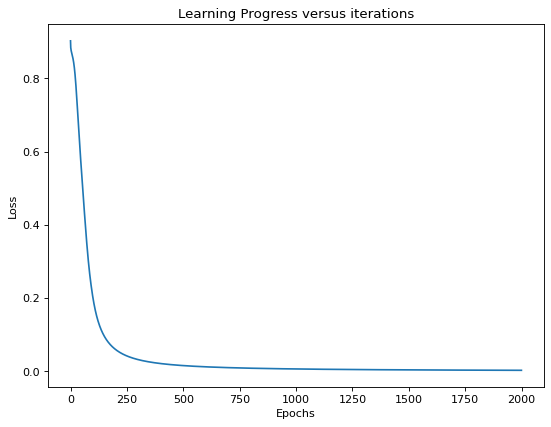

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
plt.plot(loss)
plt.title("Learning Progress versus iterations")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

### EXPERIMENTS - Tweaking the learning rate or the number of iterations

#### EXPERIMENT 1

This experiment trains the network with a lower learning rate(0.5) keeping the iterations the same (2000) as the initial training method

In [ ]:
Xdata,Ydata=make_input_data()
W10,W21,b1,b2=reset_network(8,3,8)
iterations=2000
max_iterations=iterations
alpha=0.5
loss=[]
while iterations>=1:
    #print("---------------ITERATION "+str(max_iterations-iterations)+"-----------------")
    ### Note: Using the Jacobian as value and then updating(rectifying) with those values with the back propagate function
    W21=backward_propagate_W21(Xdata,Ydata,W10,W21,b1,b2,alpha)
    b2=backward_propagate_b2(Xdata,Ydata,W10,W21,b1,b2,alpha)
    W10=backward_propagate_W10(Xdata,Ydata,W10,W21,b1,b2,alpha)
    b1=backward_propagate_b1(Xdata,Ydata,W10,W21,b1,b2,alpha)
    loss.append(getCost(Xdata,Ydata))
    print("Epoch: ",str(max_iterations-iterations),"|| Loss: ",loss[-1])
    iterations-=1

print("\nTrained weights and Biases:\n")
printWeightsAndBiases()

Epoch:  0 || Loss:  0.9552118371724222
Epoch:  1 || Loss:  0.8919872233791803
Epoch:  2 || Loss:  0.8754443612880428
Epoch:  3 || Loss:  0.8683209130343279
Epoch:  4 || Loss:  0.864127211002502
Epoch:  5 || Loss:  0.8610225757099599
Epoch:  6 || Loss:  0.8583460062183229
Epoch:  7 || Loss:  0.8558237436351795
Epoch:  8 || Loss:  0.8533307315878698
Epoch:  9 || Loss:  0.8508053298564137
Epoch:  10 || Loss:  0.8482150384952638
Epoch:  11 || Loss:  0.8455415193661212
Epoch:  12 || Loss:  0.842773621383589
Epoch:  13 || Loss:  0.8399039579432819
Epoch:  14 || Loss:  0.8369271464109677
Epoch:  15 || Loss:  0.8338388634727628
Epoch:  16 || Loss:  0.8306353233504684
Epoch:  17 || Loss:  0.8273129914370484
Epoch:  18 || Loss:  0.823868441702472
Epoch:  19 || Loss:  0.820298311512256
Epoch:  20 || Loss:  0.8165993290120127
Epoch:  21 || Loss:  0.8127683983344365
Epoch:  22 || Loss:  0.8088027323202126
Epoch:  23 || Loss:  0.8047000238204621
Epoch:  24 || Loss:  0.8004586461340985
Epoch:  25 || 

#### EXPERIMENT 2

This example trains the network with a large number of iterations (4000) keeping the learning rate (1) same as the initial training method

In [ ]:
Xdata,Ydata=make_input_data()
W10,W21,b1,b2=reset_network(8,3,8)
iterations=4000
max_iterations=iterations
alpha=1
loss=[]
while iterations>=1:
    #print("---------------ITERATION "+str(max_iterations-iterations)+"-----------------")
    ### Note: Using the Jacobian as value and then updating(rectifying) with those values with the back propagate function
    W21=backward_propagate_W21(Xdata,Ydata,W10,W21,b1,b2,alpha)
    b2=backward_propagate_b2(Xdata,Ydata,W10,W21,b1,b2,alpha)
    W10=backward_propagate_W10(Xdata,Ydata,W10,W21,b1,b2,alpha)
    b1=backward_propagate_b1(Xdata,Ydata,W10,W21,b1,b2,alpha)
    loss.append(getCost(Xdata,Ydata))
    print("Epoch: ",str(max_iterations-iterations),"|| Loss: ",loss[-1])
    iterations-=1

print("\nTrained weights and Biases:\n")
printWeightsAndBiases()

Epoch:  0 || Loss:  0.878988236796988
Epoch:  1 || Loss:  0.8710802954358864
Epoch:  2 || Loss:  0.867803407430291
Epoch:  3 || Loss:  0.8650242482098702
Epoch:  4 || Loss:  0.8621927553025818
Epoch:  5 || Loss:  0.8591646854555852
Epoch:  6 || Loss:  0.8558648478039181
Epoch:  7 || Loss:  0.8522305501052141
Epoch:  8 || Loss:  0.8482002610334624
Epoch:  9 || Loss:  0.8437121686062622
Epoch:  10 || Loss:  0.838705792231607
Epoch:  11 || Loss:  0.8331248191068806
Epoch:  12 || Loss:  0.8269203239326424
Epoch:  13 || Loss:  0.8200538587287503
Epoch:  14 || Loss:  0.8125002393608765
Epoch:  15 || Loss:  0.8042501993433951
Epoch:  16 || Loss:  0.7953131941436394
Epoch:  17 || Loss:  0.7857203600434043
Epoch:  18 || Loss:  0.7755270727472087
Epoch:  19 || Loss:  0.7648140654531665
Epoch:  20 || Loss:  0.7536860120074519
Epoch:  21 || Loss:  0.74226696438221
Epoch:  22 || Loss:  0.7306928438922132
Epoch:  23 || Loss:  0.7191019684867367
Epoch:  24 || Loss:  0.7076250884995179
Epoch:  25 || L

#### EXPERIMENT 3

This experiment trains the network with changing both the learning rate and the number of iterations, 
i.e. More iterations (4000) with a lower learning rate (0.5)

In [ ]:
Xdata,Ydata=make_input_data()
W10,W21,b1,b2=reset_network(8,3,8)
iterations=4000
max_iterations=iterations
alpha=0.5
loss=[]
while iterations>=1:
    #print("---------------ITERATION "+str(max_iterations-iterations)+"-----------------")
    ### Note: Using the Jacobian as value and then updating(rectifying) with those values with the back propagate function
    W21=backward_propagate_W21(Xdata,Ydata,W10,W21,b1,b2,alpha)
    b2=backward_propagate_b2(Xdata,Ydata,W10,W21,b1,b2,alpha)
    W10=backward_propagate_W10(Xdata,Ydata,W10,W21,b1,b2,alpha)
    b1=backward_propagate_b1(Xdata,Ydata,W10,W21,b1,b2,alpha)
    loss.append(getCost(Xdata,Ydata))
    print("Epoch: ",str(max_iterations-iterations),"|| Loss: ",loss[-1])
    iterations-=1

print("\nTrained weights and Biases:\n")
printWeightsAndBiases()

Epoch:  0 || Loss:  0.9885740711699615
Epoch:  1 || Loss:  0.8979987587005206
Epoch:  2 || Loss:  0.8722374612749131
Epoch:  3 || Loss:  0.8611497885808739
Epoch:  4 || Loss:  0.8548450571219883
Epoch:  5 || Loss:  0.850402061640751
Epoch:  6 || Loss:  0.8467459827341784
Epoch:  7 || Loss:  0.8434221645024812
Epoch:  8 || Loss:  0.8402184324118156
Epoch:  9 || Loss:  0.8370280587190568
Epoch:  10 || Loss:  0.8337940404634979
Epoch:  11 || Loss:  0.8304844878829557
Epoch:  12 || Loss:  0.8270810543694768
Epoch:  13 || Loss:  0.823573221987779
Epoch:  14 || Loss:  0.8199553570407115
Epoch:  15 || Loss:  0.8162251274062121
Epoch:  16 || Loss:  0.8123826048626117
Epoch:  17 || Loss:  0.8084297120843226
Epoch:  18 || Loss:  0.8043698368354361
Epoch:  19 || Loss:  0.8002075193509259
Epoch:  20 || Loss:  0.7959481646931621
Epoch:  21 || Loss:  0.7915977588947676
Epoch:  22 || Loss:  0.7871625845475781
Epoch:  23 || Loss:  0.7826489420540141
Epoch:  24 || Loss:  0.7780628887817808
Epoch:  25 |

#### EXPERIMENT 4

The back propogation here is modified in such a way that while updating the weights while mulitplying the derivatives with the learning weight there is an additional 10% noise (of the magnitude of the gradient) which is included into the gradient keeping the learning rate and number of iterations same as the initial training method, i.e. 1 and 2000 respectively. 

In [ ]:
# BACK PROPAGATION OF LAYER 2 i.e. OUTPUT LAYER TO LAYER 1
dsigmoid_by_dz = lambda z : np.exp(z)/(1+np.exp(z))**2
global alpha1, noise
alpha1 = 1
noise = np.random.randn()/10
W10,W21,b1,b2=reset_network(8,3,8)
def backward_propagate_W21(X,Y,W10,W21,b1,b2): 
    for i in range(X[0].size):
        a0, z01, a1, z12, a2 = forward_propagate(X[i]) # forward propagating the input one at a time through the network.
        result1=2*(a2.T-Y[i]) # this is d(Cost) / d(activation)
        result1=result1*(dsigmoid_by_dz(z12).T) # this is d(a) / d(z)
        result1 = result1.T@a1 # this is d(z)/d(w)
        W21 = W21 - alpha1*(result1*(1+noise)) # rectifying the weight at this layer based on the error gradient to complete back-propagation
        # print("After W21 rectification:","Input:",a0,"\nHidden Layer Activation:",a1,"\nPrediction:",a2.T,"\n")
    return W21
def backward_propagate_b2(X,Y,W10,W21,b1,b2):
    for i in range(X[0].size):
        a0, z01, a1, z12, a2 = forward_propagate(X[i]) # forward propagating the input one at a time through the network.
        result2=2*(a2.T-Y[i]) # this is d(Cost) / d(activation)
        result2=(result2*dsigmoid_by_dz(z12).T).T # this is d(a) / d(z)
        result2 = np.sum(result2, axis=1, keepdims=True) 
        b2 = b2 - alpha1*(result2*(1+noise))  # rectifying the bias at this layer based on the error gradient to complete back-propagation
        # print("After b2 rectification:","Input:",a0,"\nHidden Layer Activation:",a1,"\nPrediction:",a2.T,"\n")
    return b2
    # BACK PROPAGATION OF LAYER 1 TO LAYER 0 i.e. INPUT LAYER
def backward_propagate_W10(X,Y,W10,W21,b1,b2):
    for i in range(X[0].size):
        a0, z01, a1, z12, a2 = forward_propagate(X[i]) # forward propagating the input one at a time through the network.
        result3 = 2*(a2.T-Y[i])  #1x8        # this is d(Cost) / d(activation)
        result3=result3* dsigmoid_by_dz(z12).T #1x8 = 1x8 * 1x8        # this is d(a) / d(z)
        result3 = (result3@W21) #1x3 = 1x8 X 8x3        # this is d(z)/d(a)
        result3=(result3*dsigmoid_by_dz(z01)).T #3x1 = 3x1 * 3x1      # this is d(a) / d(z)  
        result3 = result3@np.expand_dims(a0,0) #3x8 = 3x1 X 1x8       # this is d(z) / d(w)
        W10 = W10 - alpha1*(result3*(1+noise))  # rectifying the weight at this layer based on the error gradient to complete back-propagation
        # print("After W10 rectification:","Input:",a0,"\nHidden Layer Activation:",a1,"\nPrediction:",a2.T,"\n")
    return W10
def backward_propagate_b1(X,Y,W10,W21,b1,b2):
    for i in range(X[0].size):
        a0, z01, a1, z12, a2 = forward_propagate(X[i]) # forward propagating the input one at a time through the network.
        result4 = 2*(a2.T-Y[i]) # this is d(Cost) / d(activation)
        result4= result4 * dsigmoid_by_dz(z12).T # this is d(a) / d(z)
        result4 = (result4@W21)     # this is d(z)/d(a)
        result4= (result4 * dsigmoid_by_dz(z01)).T      # this is d(a) / d(z)  
        result4 = np.sum(result4, axis=1, keepdims=True)
        b1 = b1 - alpha1*(result4*(1+noise))   # rectifying the bias at this layer based on the error gradient to complete back-propagation
        #print("After b1 rectification:","Input:",a0,"\nHidden Layer Activation:",a1,"\nPrediction:",a2.T,"\n")
    return b1

Xdata,Ydata=make_input_data()
W10,W21,b1,b2=reset_network(8,3,8)
iterations=2000
max_iterations=iterations
alpha=1
loss=[]
while iterations>=1:
    #print("---------------ITERATION "+str(max_iterations-iterations)+"-----------------")
    ### Note: Using the Jacobian as value and then updating(rectifying) with those values with the back propagate function
    W21=backward_propagate_W21(Xdata,Ydata,W10,W21,b1,b2)
    b2=backward_propagate_b2(Xdata,Ydata,W10,W21,b1,b2)
    W10=backward_propagate_W10(Xdata,Ydata,W10,W21,b1,b2)
    b1=backward_propagate_b1(Xdata,Ydata,W10,W21,b1,b2)
    loss.append(getCost(Xdata,Ydata))
    print("Epoch: ",str(max_iterations-iterations),"|| Loss: ",loss[-1])
    iterations-=1

print("\nTrained weights and Biases:\n")
printWeightsAndBiases()

Epoch:  0 || Loss:  0.915713757141286
Epoch:  1 || Loss:  0.8866557281535329
Epoch:  2 || Loss:  0.8781795041017557
Epoch:  3 || Loss:  0.8737293772140589
Epoch:  4 || Loss:  0.8703864940000573
Epoch:  5 || Loss:  0.8673536219423702
Epoch:  6 || Loss:  0.8643523922035337
Epoch:  7 || Loss:  0.8612616240301599
Epoch:  8 || Loss:  0.8580128976687587
Epoch:  9 || Loss:  0.8545556728771236
Epoch:  10 || Loss:  0.850844599891084
Epoch:  11 || Loss:  0.8468347904812675
Epoch:  12 || Loss:  0.842480284977299
Epoch:  13 || Loss:  0.8377340527550609
Epoch:  14 || Loss:  0.8325489844288358
Epoch:  15 || Loss:  0.826879756488293
Epoch:  16 || Loss:  0.820685576929761
Epoch:  17 || Loss:  0.813933774018021
Epoch:  18 || Loss:  0.8066040012804159
Epoch:  19 || Loss:  0.7986925338048602
Epoch:  20 || Loss:  0.7902158167077422
Epoch:  21 || Loss:  0.7812122611304868
Epoch:  22 || Loss:  0.771741439656
Epoch:  23 || Loss:  0.7618803663377398
Epoch:  24 || Loss:  0.7517172991092939
Epoch:  25 || Loss: 

### INTERPRETATION OF CONCEPTS & EXPERIMENTAL RESULTS:

##### __Neural network as a generalization of Logistic regression:__
###### A single neuron is a (w,b, z, Sigmoid, a) structure where 'w' is the weight of the connection between previous and current layer, 'b' is the bias added to the net weighted sum of activations of previous layer neurons, 'z' is the total including weight sums and bias, 'sigmoid' is an example function to add non-linearity and restricting the output to a limited range, and 'a' is the final activation value reached at current neuron after applying the 'sigmoid' or any other activation function to 'z'. It also makes sense to say that this neuron resembles one logistic regression model that predicts a probabilistic value between two classes given training samples. This line of thought can thus be extended to generalize that a neural network can be thought of as a network of multiple logistic regression models.

##### __Diminishing magnitude of prediction error while backpropagating the error in a neural network:__
The error between actual and predicted output when backpropagated reduces in magnitude which is due to the sigmoid activation function being restricted from to a decimal value between 0 to 1. The chain rule of derivative multiplication to propagate the error gradient back through the network means more multiplications with more layers and hence a smaller value closer to 0.

##### __Implication of learning rate (alpha):__
Normally the learning rate maybe very low (0.0001 or lower) in a cost landscape with multiple local optima, for instance like a rastrigin function. In our example however, its a perfect world and all the training examples are available for training, thereby prompting for a very aggressive(high) learning rate. We experimented and observed that given same number of iterations, a higher learning rate gave a lower error in prediction.

##### __Experimental results with number of iterations:__
It was experimentally confirmed that higher the number of iterations, lower the error but higher the computational power consumption. So a threshold can be set on the error to stop the convergence.

##### __Adding noise to the gradient (first derivative) of weights and biases:__
To model a noise factor in the gradient measurement, 10% of the magnitude of the gradient was added / substracted from it. It was observed that this ensures quicker convergence.

### TRIAL SPACE (ROUGH WORK)

In [ ]:
# TRIALS TO ENSURE DIMENSIONALITY WHILE FORWARD AND BACK PROPAGATION

# reset_network(8,3,8)
# print(np.shape(W10))
# print(np.shape(b1.T))
# op=forward_propagate(np.array([[1,0,0,0,0,0,0,0]]))
# op=forward_propagate(np.array([0,0,0,0,1,0,0,0]))
# np.shape(op[2].T)
# np.shape(op[1])
# op[4]
# print(np.shape(W10))
# print(np.shape(X[0]))
# print(np.shape(W10@X[0]))
# print(np.shape(b1.T))
# print(np.shape(op[1]))
# print("----------------")
# print(np.shape(W21))
# print(np.shape(op[2].T))
# print(np.shape(W21 @ op[2].T))
# print(np.shape(b2))
# print(np.shape(op[3]))
# print(np.shape(op[4]))
# print(op[4].T)
# print(np.shape(op[4].T))
# dsigmoid_by_dz(op[3].T)
# result2=2*(op[4].T-Y[0])
# result2=(result2*dsigmoid_by_dz(op[3]).T).T
# result2 = np.sum(result2, axis=1, keepdims=True)
# result2
# result1=2*(op[4].T-Y[0])
# result1=result1*dsigmoid_by_dz(op[3]).T
# result1 = result1.T@op[2] / 8 #dividing by X.size

# result3 = 2*(op[4].T-Y[0]) #1x8
# result3=result3 * dsigmoid_by_dz(op[3]).T #1x8 = 1x8 * 1x8
# result3 = (result3@W21) #1x3 = 1x8 X 8x3
# result3=(result3*dsigmoid_by_dz(op[1])).T #3x1 = 3x1 * 3x1
# result3 = result3@np.expand_dims(op[0],0) #3x8 = 3x1 X 1x8
# np.shape(result3.T)
# result3
# dsigmoid_by_dz(op[3]).T
# np.expand_dims(X[0],0)
# dsigmoid_by_dz(op[1])
# dsigmoid_by_dz(op[3])
# W21
# result4 = 2*(op[4].T-Y[0]) #1x8
# result4= result4 * dsigmoid_by_dz(op[3]).T #1x8
# result4 = (result4@W21) #1x3
# result4= (result4 * dsigmoid_by_dz(op[1])).T #3x1
# result4 = np.sum(result4, axis=1, keepdims=True) 
# b1 = b1 - alpha*result4
# result4
# b1

In [ ]:
# X,Y = make_input_data()
# costing=cost(X[0],Y[0])
# print(costing)
# print(Y[0])
# forward_propagate(X[0])[-1].T-Y[0]


In [ ]:
# ((((np.array([[0.48490041], [0.45406109], [0.65732189], [0.54209139], [0.64255039], [0.2308069 ], [0.42543054], [0.64391395]]).T-Y[0])**2)**(0.5))/8)
# ((np.array([[0.48490041], [0.45406109], [0.65732189], [0.54209139], [0.64255039], [0.2308069 ], [0.42543054], [0.64391395]]).T-Y[0])**2)

In [ ]:
# costing
# a2=np.zeros((8,1)).T
# a2+[1,2,3,1,3,2,1,2]+[2,1,1,2,3,2,2,1]

In [ ]:
# def forward_propagation(X,Y):
#     reset_network()
#     prediction_error=0
#     a2=np.array([[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]])
#     for i in range(X[0].size):
#         prediction=forward_propagate(X[i])[-1]
#         a2+=(prediction.T - Y[i])**2
#     return a2/X[0].size
# average_activations=forward_propagation(X,Y)
# average_activations